#### Importing all the dependencies required to build the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder

#### Reading the csv file into DataFrame

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#### Reading the top 5 data from train and test DataFrame

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Finding the shape of the test dataset and train dataset

In [5]:
print('Shape of Train DF is:', train_df.shape)
print('Shape of Test DF is:', test_df.shape)

Shape of Train DF is: (1460, 81)
Shape of Test DF is: (1459, 80)


#### Checking the dataset information using the info() command

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### We can clearly see that there are lot of missing data in the dataset. Let us check the columns which have missing items.

In [7]:
train_df.columns[train_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

#### It looks like we have 19 such columns which have the missing values.Any columns which have >60% of missing values should be straight away dropped for the model. Because missing values will affect the performance of the model.

In [8]:
nulls = train_df.isnull().sum().sort_values(ascending=False)[:19]
nulls

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

#### Let us find the percentage of the missing values in the columns.

In [9]:
missing_values = train_df.isnull().sum()/len(train_df)*100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

#### We can see that PoolQC has 99.52% of missing values followed by MiscFeature(96.30%),Alley (93.76%) & Fence(80.75%). These are the 4 columns which have missing values >60% which cannot be used as the feature for the model.

### Let us visualize the missing values of the above mentioned columns.

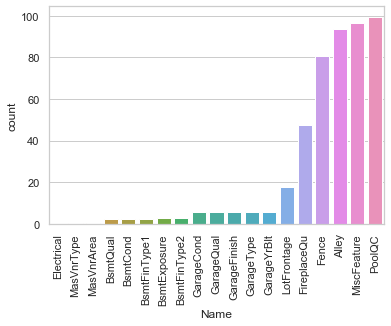

In [10]:
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

#We will use the seaborn to plot the missing values count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

### Finding the number of Numerical and Categorical Features

In [11]:
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


### Find the columns of numerical and categorical features

In [12]:
print(train_df[numerical_feats].columns)
print("*"*100)
print(train_df[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

### Wrangling the Numeric Features

#### Now let us find the corelation between the features and target variable

In [13]:
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


#### We can see that the correlation is showing only the relation between target variable and feature variable of 38 columns rather than 80 columns which is available in the data frame. It means that, we need to analyze the categorical columns which can impact the target variable seperately.

### We can visualize the corelation between the features and target variable using the heatmap for numerical features

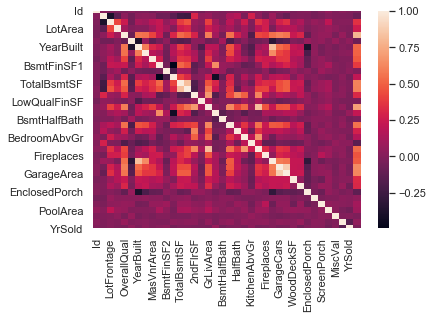

In [14]:
corr = train_df.corr()
sns.heatmap(corr)
plt.show()

#### Let us find the top 15-20 features which have corelation with the target variable.

In [15]:
corr['SalePrice'].sort_values(ascending=False)[:21]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

#### Later we will take all the above as feature columns for prediction and then using the feature selection method will optimize the variables which can be used for prediction. Note that, these features are numeric and we are yet to find the categorical features. 

In [16]:
strong_num_corr = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea']

#### Now let us look at the data of the target variable ('SalePrice')

In [17]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### It tells us that it has mean price of 180K and max price of 755K. Most of the data falls between 130K and 214K.

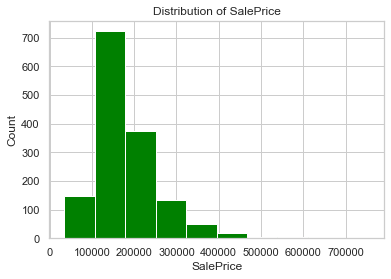

In [18]:
# us visualize the distribution of the SalePrice.

plt.hist(train_df['SalePrice'],color='green')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Distribution of SalePrice')
plt.show()

#### We can see that SalePrice distribution is not uniform and is skewed towards left. For working with the regression problem, if the distribution is skewed, we need perform the Data Transformation Technique(Log transformation) of the target variable when skewed. the resason for performing the transformation is due to the improvement in the linearity of the data and helps in better visualization. Skewed Distribution can reduce the performance of the ML regression models because some assume normal distribution.

In [19]:
# we can find the skewness value of the distribution.
print ("Skewness before transformation is:", train_df.SalePrice.skew())

Skewness before transformation is: 1.8828757597682129


Skewness after transformation is: 0.12133506220520406


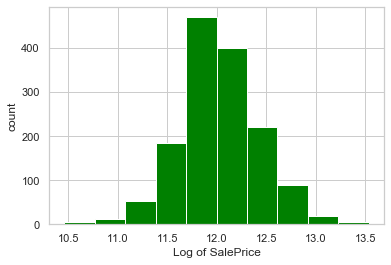

In [20]:
target = np.log(train_df.SalePrice)
print ("Skewness after transformation is:", target.skew())

plt.hist(target, color='green')
plt.xlabel('Log of SalePrice')
plt.ylabel('count')
plt.show()

### Let us further investigate the relationalship between the target variable and some of the top corelated features.

In [21]:
quality_pivot = train_df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [22]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


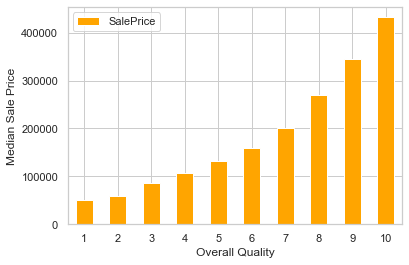

In [23]:
quality_pivot.plot(kind='bar', color='orange')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#### It tells us that, as the overall quality of the building increases Sales Price is also increasing which in fact is true in the real world application.

### Let us visualize the relationship between the Ground Living Area GrLivArea and SalePrice.

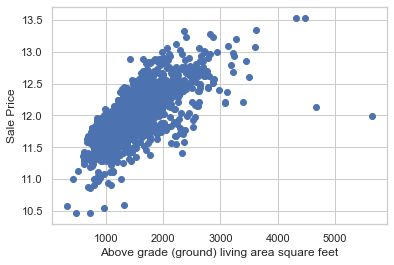

In [24]:
plt.scatter(x=train_df['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

#### We can see that their is linearity between Living Area and Sale Price. Along with that there are many outliers present in the data which needs to be worked to remove them later.

### Let us visualize the relationship between the GarageCars and SalePrice features

In [25]:
train_df['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [26]:
garage_pivot = train_df.pivot_table(index='GarageCars', values='SalePrice', aggfunc=np.median)

In [27]:
garage_pivot

,SalePrice
GarageCars,
0,100000
1,128000
2,177750
3,295000
4,200000


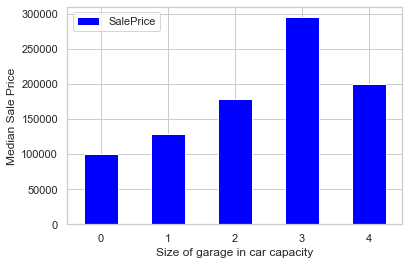

In [28]:
garage_pivot.plot(kind='bar', color='blue')
plt.xlabel('Size of garage in car capacity')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#### As the capacity of the cars in the garage increases the sales prices also increases. But at the highest capacity of the garage cars the sale prices is lower. This might be outlier which will be dealt while working on the outliers.

### Let us visualize the relationship between the GarageArea and SalePrice features

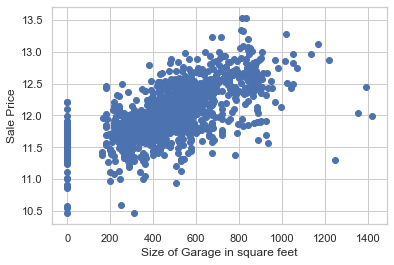

In [29]:
plt.scatter(x=train_df['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Size of Garage in square feet')
plt.show()

#### If you notice that there are many homes with 0 for Garage Area, indicating that they don’t have a garage. We will use this piece of information later to deal with the missing values of columns which are related to Garage. There are some outliers beyond 1200 Sq ft area which needs to removed. 

### Let us visualize the relationship between the TotalBsmtSF and SalePrice features

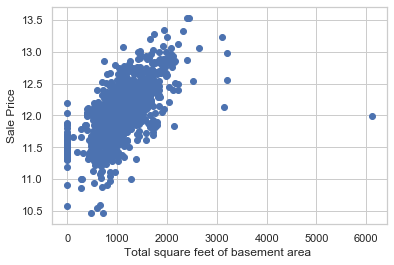

In [30]:
plt.scatter(x=train_df['TotalBsmtSF'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Total square feet of basement area ')
plt.show()

#### If you notice that there are many homes with 0 for TotalBsmtSF, indicating that they don’t have a basement.  There are some outliers beyond 3000 Sq ft area which needs to removed.

### Wrangling the Categorical Features

#### Let us find all the categorical columns avaliable in the dataframe.

In [31]:
cat_variables = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

#### List of categorical features and their unique values

In [32]:
for catg in cat_variables :
    print(train_df[catg].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
############################################

### Let us create a boxplots for visualizing the categorical variables

In [33]:
#Defining the blox plot functions 
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x = plt.xticks(rotation=90)

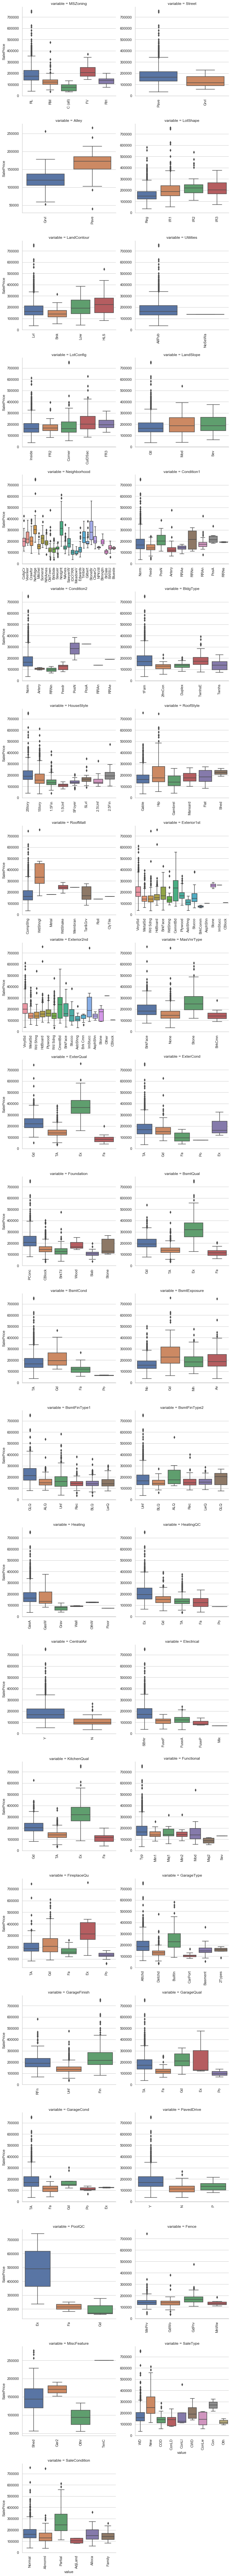

In [34]:
#Creating an unpivoted data frame using the melt functions of pandas 
p = pd.melt(train_df, id_vars='SalePrice', value_vars=cat_variables)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, 'value','SalePrice')

#### We can see that most of the variables possess outlier values.It would take a very long time, if we want to remove the outliers for each and every column. At the moment we will keep it as it is and like to look which categorical features have impact on the SalePrice.

In [35]:
new_cat_variables = ['SalePrice']
renew_cat_var = cat_variables + new_cat_variables
df_cat = train_df[renew_cat_var]

In [36]:
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [37]:
df_cat = df_cat.drop(['FireplaceQu','Fence','Alley','MiscFeature','PoolQC'],axis='columns')

In [38]:
df_cat.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

In [39]:
Garage_df = train_df[train_df['GarageArea']==0]

In [40]:
var = ['GarageArea','GarageType','GarageFinish','GarageQual','GarageCond']

In [41]:
Garage_df[var].head()

,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
39,0,NaN,NaN,NaN,NaN
48,0,NaN,NaN,NaN,NaN
78,0,NaN,NaN,NaN,NaN
88,0,NaN,NaN,NaN,NaN
89,0,NaN,NaN,NaN,NaN


#### We can see that for all the Garage Area which are having values 0, GarageType, GarageFinish, GarageQual & GarageCond are having null values. We can convert these NA values to None.

In [42]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_cat[col] = df_cat[col].fillna('None')

In [43]:
Base_df = train_df[train_df['TotalBsmtSF']==0]

In [44]:
vars = ['TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'] 

In [45]:
Base_df[vars].head()

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,0,NaN,NaN,NaN,NaN,NaN
39,0,NaN,NaN,NaN,NaN,NaN
90,0,NaN,NaN,NaN,NaN,NaN
102,0,NaN,NaN,NaN,NaN,NaN
156,0,NaN,NaN,NaN,NaN,NaN


#### We can clearly see that for the TotalBasementArea having 0, all the values of 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' are having null values. Let us fill up all the NA values with None.

In [46]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_cat[col] = df_cat[col].fillna('None')

#### Filling up the values of 'Electrical' coulmn which have only one missing value. Filling up this value with the most suitable value.

In [47]:
df_cat['Electrical'] = df_cat['Electrical'].fillna("SBrkr")

In [48]:
train_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [49]:
varse = ['MasVnrArea','MasVnrType']

In [50]:
Masnory_df = train_df[train_df['MasVnrType'].isnull()]

In [51]:
Masnory_df[varse].head()

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN


In [52]:
for col in ('MasVnrType',):
    df_cat[col] = df_cat[col].fillna('None')

#### Feature Engineering of categorical variables to figure out the features which have hig corelation with the SalePrice

In [53]:
new_df_cat = pd.get_dummies(df_cat, drop_first=True)

In [54]:
new_df_cat.head()

,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,181500,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,223500,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,140000,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,250000,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


#### Finding the corelation between categorical variables and the target variable

In [55]:
new_df_cat.corr()

,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SalePrice,1.000000,0.089950,-0.065429,0.245063,-0.288065,0.041036,0.126096,0.036720,-0.267672,0.120014,...,0.014371,-0.027475,0.357509,-0.034895,-0.242598,-0.050686,-0.015525,-0.046480,-0.153990,0.352060
MSZoning_FV,0.089950,1.000000,-0.022722,-0.416608,-0.090435,0.013866,0.023612,-0.017926,0.074564,-0.040649,...,-0.012654,-0.012654,0.198831,-0.009795,-0.151069,-0.011314,-0.019651,-0.025439,-0.124064,0.195066
MSZoning_RH,-0.065429,-0.022722,1.000000,-0.203158,-0.044101,0.006762,0.021930,-0.008742,0.039092,0.052529,...,-0.006171,-0.006171,-0.031785,-0.004776,0.021659,-0.005517,-0.009583,-0.012405,-0.036497,-0.032210
MSZoning_RL,0.245063,-0.416608,-0.203158,1.000000,-0.808585,0.045348,0.027175,0.022698,-0.268764,0.023808,...,0.001671,-0.027031,0.004972,0.023511,0.015608,0.027158,-0.008548,-0.025492,0.046098,0.002730
MSZoning_RM,-0.288065,-0.090435,-0.044101,-0.808585,1.000000,-0.003127,-0.047949,-0.011491,0.242838,-0.026057,...,0.008337,0.041233,-0.105674,-0.019011,0.078404,-0.021959,0.004432,0.049827,0.050686,-0.100724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.050686,-0.011314,-0.005517,0.027158,-0.021959,0.003367,-0.008909,-0.004353,0.012666,-0.009870,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.015525,-0.019651,-0.009583,-0.008548,0.004432,-0.112734,-0.015474,-0.007560,0.037744,0.024571,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,-0.046480,-0.025439,-0.012405,-0.025492,0.049827,0.007571,-0.020032,0.061658,0.028480,0.042610,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,-0.153990,-0.124064,-0.036497,0.046098,0.050686,-0.002140,0.014667,-0.026089,-0.003730,-0.059157,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


#### Visualizing the corelation between categorical variables with the SalePrice

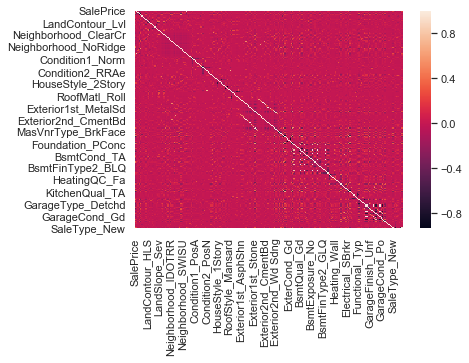

In [56]:
corr_cat = new_df_cat.corr()
sns.heatmap(corr_cat)
plt.show()

#### Finding the Top 20 corelation values with the SalePrice

In [57]:
corr_cat['SalePrice'].sort_values(ascending=False)[:21]

SalePrice                1.000000
Foundation_PConc         0.497734
ExterQual_Gd             0.452466
BsmtFinType1_GLQ         0.434597
Neighborhood_NridgHt     0.402149
SaleType_New             0.357509
SaleCondition_Partial    0.352060
GarageType_Attchd        0.335961
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
KitchenQual_Gd           0.321641
BsmtExposure_Gd          0.307298
Exterior2nd_VinylSd      0.306389
Exterior1st_VinylSd      0.305009
GarageCond_TA            0.275872
CentralAir_Y             0.251328
GarageQual_TA            0.245346
MSZoning_RL              0.245063
HouseStyle_2Story        0.242880
Electrical_SBrkr         0.242357
RoofStyle_Hip            0.235897
Name: SalePrice, dtype: float64

In [58]:
strong_cat_corr = [ 'MSZoning','Foundation','BsmtFinType1','Neighborhood','GarageType','MasVnrType', 'ExterQual', 
                   'CentralAir', 'Electrical', 'KitchenQual', 'SaleType','SaleCondition','BsmtExposure','Exterior2nd',
                   'Exterior1st','GarageCond','GarageQual','HouseStyle','RoofStyle']

#### Now we have found out the top 20 categorical variables of both numerical and categorical features seperately. Let's create a feature col which gives the list of all the features to consider for the model.

In [59]:
feature_cols = strong_num_corr + strong_cat_corr + ['MSSubClass','SalePrice'] #For Traning dataset
new_feature_cols = strong_num_corr + strong_cat_corr + ['MSSubClass']          #For Test dataset #Added MSSubClass just to fill up the misisng values for MSZoning and later will drop it from the column list

In [60]:
len(feature_cols)

41

#### We have brought down the total of 80 features available in the tranining data set into 40 features into consideration for the model. We can further optimize the number of features in the later stage of the analysis.

#### Let us create a different data frame for test and train dataset by using only the features which are having strong correlation with the target variable.

In [61]:
df_train = train_df[feature_cols]
df_test = test_df[new_feature_cols]

In [62]:
df_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,SaleCondition,BsmtExposure,Exterior2nd,Exterior1st,GarageCond,GarageQual,HouseStyle,RoofStyle,MSSubClass,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,...,Normal,No,VinylSd,VinylSd,TA,TA,2Story,Gable,60,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,Normal,Gd,MetalSd,MetalSd,TA,TA,1Story,Gable,20,181500
2,7,1786,2,608,920,920,2,6,2001,2002,...,Normal,Mn,VinylSd,VinylSd,TA,TA,2Story,Gable,60,223500
3,7,1717,3,642,756,961,1,7,1915,1970,...,Abnorml,No,Wd Shng,Wd Sdng,TA,TA,2Story,Gable,70,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,Normal,Av,VinylSd,VinylSd,TA,TA,2Story,Gable,60,250000


In [63]:
df_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,SaleType,SaleCondition,BsmtExposure,Exterior2nd,Exterior1st,GarageCond,GarageQual,HouseStyle,RoofStyle,MSSubClass
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,...,WD,Normal,No,VinylSd,VinylSd,TA,TA,1Story,Gable,20
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,...,WD,Normal,No,Wd Sdng,Wd Sdng,TA,TA,1Story,Hip,20
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,...,WD,Normal,No,VinylSd,VinylSd,TA,TA,2Story,Gable,60
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,...,WD,Normal,No,VinylSd,VinylSd,TA,TA,2Story,Gable,60
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,...,WD,Normal,No,HdBoard,HdBoard,TA,TA,1Story,Gable,120


### Imputing the Missing Values

#### When transforming features, it’s important to remember that any transformations that you’ve applied to the training data before fitting the model must be applied to the test data.

In [64]:
nulls_df = df_train.isnull().sum().sort_values(ascending=False)[:11]
nulls_test = df_test.isnull().sum().sort_values(ascending=False)[:20]

#### There are 10 columns which have the missing values in the train data frame or dataset.

In [65]:
nulls_df

LotFrontage     259
GarageQual       81
GarageCond       81
GarageYrBlt      81
GarageType       81
BsmtExposure     38
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
YearRemodAdd      0
dtype: int64

#### There are 18 columns which have missing values in the test data frame

In [66]:
nulls_test

LotFrontage     227
GarageYrBlt      78
GarageQual       78
GarageCond       78
GarageType       76
BsmtExposure     44
BsmtFinType1     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
GarageArea        1
TotalBsmtSF       1
BsmtFinSF1        1
SaleType          1
GarageCars        1
Exterior2nd       1
Exterior1st       1
KitchenQual       1
YearRemodAdd      0
Fireplaces        0
dtype: int64

#### Let's fill up the valus for 'LotFrontage'

#### LotFrontage: Linear feet of street connected to property. Let us fill up the missing values of the Lot Frontage by the median values grouped by the Neighbourhood. Assumption is that for the particular neighbourhood we take the median values.

In [67]:
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### The other way of doing the above transformation is shown below.
#lot_frontage_by_neighborhood = df_train['LotFrontage'].groupby(df_train['Neighborhood'])

#for key, group in lot_frontage_by_neighborhood:
    #idx = (df_train['Neighborhood'] == key) & (df_train['LotFrontage'].isnull())
    #df_train.loc[idx, 'LotFrontage'] = group.median()

#### Let's fill up the values of 'GarageYrBlt'

In [68]:
lis = ['GarageYrBlt','YearBuilt']
df_train[lis].head(10)

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
5,1993.0,1993
6,2004.0,2004
7,1973.0,1973
8,1931.0,1931
9,1939.0,1939


In [69]:
df_train[lis].tail(10)

,GarageYrBlt,YearBuilt
1450,NaN,1974
1451,2008.0,2008
1452,2005.0,2005
1453,NaN,2006
1454,2004.0,2004
1455,1999.0,1999
1456,1978.0,1978
1457,1941.0,1941
1458,1950.0,1950
1459,1965.0,1965


#### If you observe the garage year bulit in most of the cases is equal to the Year Built. We can fill up the missing values with Year Built value.

In [70]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['YearBuilt'])
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_train['YearBuilt'])

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Let's fill up the values for 'GarageQual','GarageCond','GarageType'.

In [71]:
lis = ['GarageQual','GarageCond','GarageType','Neighborhood']
df_train[lis][df_train['Neighborhood']=='CollgCr'].head(20)

,GarageQual,GarageCond,GarageType,Neighborhood
0,TA,TA,Attchd,CollgCr
2,TA,TA,Attchd,CollgCr
13,TA,TA,Attchd,CollgCr
22,TA,TA,Attchd,CollgCr
32,TA,TA,Attchd,CollgCr
36,TA,TA,Attchd,CollgCr
43,TA,TA,Detchd,CollgCr
57,TA,TA,Attchd,CollgCr
59,TA,TA,Detchd,CollgCr
64,TA,TA,Attchd,CollgCr


#### From the above data frame which is grouped by Neighbourhood we can see that the missing values can be filled up by using the mode function.

In [72]:
df_train[lis][df_train['Neighborhood']=='Edwards'].head(20)

,GarageQual,GarageCond,GarageType,Neighborhood
39,NaN,NaN,NaN,Edwards
97,TA,TA,Attchd,Edwards
98,Fa,TA,Basment,Edwards
110,TA,TA,Attchd,Edwards
117,TA,TA,Attchd,Edwards
145,TA,TA,Detchd,Edwards
155,NaN,NaN,NaN,Edwards
165,NaN,NaN,NaN,Edwards
175,TA,TA,Attchd,Edwards
182,TA,TA,Attchd,Edwards


In [73]:
df_train[lis][df_train['GarageQual'].isnull()].head(20)

,GarageQual,GarageCond,GarageType,Neighborhood
39,NaN,NaN,NaN,Edwards
48,NaN,NaN,NaN,OldTown
78,NaN,NaN,NaN,Sawyer
88,NaN,NaN,NaN,IDOTRR
89,NaN,NaN,NaN,CollgCr
99,NaN,NaN,NaN,NAmes
108,NaN,NaN,NaN,IDOTRR
125,NaN,NaN,NaN,IDOTRR
127,NaN,NaN,NaN,OldTown
140,NaN,NaN,NaN,NAmes


In [74]:
df_train['GarageQual'] = df_train.groupby('Neighborhood')['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train.groupby('Neighborhood')['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['GarageType'] = df_train.groupby('Neighborhood')['GarageType'].fillna(df_train['GarageType'].mode()[0])

df_test['GarageQual'] = df_test.groupby('Neighborhood')['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test.groupby('Neighborhood')['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['GarageType'] = df_test.groupby('Neighborhood')['GarageType'].fillna(df_test['GarageType'].mode()[0])

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

#### Filling up the 'Electrical' column missing data with the most suitable value.

In [75]:
df_train['Electrical'] = df_train['Electrical'].fillna("SBrkr")

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
train_df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].head(10)

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706,0,150,856
1,978,0,284,1262
2,486,0,434,920
3,216,0,540,756
4,655,0,490,1145
5,732,0,64,796
6,1369,0,317,1686
7,859,32,216,1107
8,0,0,952,952
9,851,0,140,991


#### If you can just look at the TotalBsmtSF value it is the sum of 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF' columns. We just need to consider TotalBsmtSF for the model.

#### Let's fill up the values for 'BsmtExposure','BsmtFinType1' with NA - No Basement values wherever 'TotalBsmtSF' is 0.

In [77]:
lst2= ['BsmtExposure','BsmtFinType1','TotalBsmtSF','YearBuilt']
df_train[lst2][df_train['BsmtExposure'].isnull()].head(40)

,BsmtExposure,BsmtFinType1,TotalBsmtSF,YearBuilt
17,NaN,NaN,0,1967
39,NaN,NaN,0,1955
90,NaN,NaN,0,1950
102,NaN,NaN,0,1979
156,NaN,NaN,0,1950
182,NaN,NaN,0,1957
259,NaN,NaN,0,1956
342,NaN,NaN,0,1949
362,NaN,NaN,0,2003
371,NaN,NaN,0,1959


#### As we can see above that the Basement area is 0 for all the null values of BsmtExposure & BsmtFinType1. So we will replace the null value with NA means No Basement as described in the decsription of the features.

In [78]:
lst2= ['BsmtExposure','BsmtFinType1','TotalBsmtSF','YearBuilt']
df_test[lst2][df_test['BsmtExposure'].isnull()].head(50)

,BsmtExposure,BsmtFinType1,TotalBsmtSF,YearBuilt
27,NaN,Unf,1595.0,2005
125,NaN,NaN,0.0,1945
133,NaN,NaN,0.0,1967
269,NaN,NaN,0.0,1981
318,NaN,NaN,0.0,1953
354,NaN,NaN,0.0,1940
387,NaN,NaN,0.0,1947
388,NaN,NaN,0.0,1954
396,NaN,NaN,0.0,1880
397,NaN,NaN,0.0,1979


In [79]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('NA')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('NA')

df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('NA')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('NA')
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

#### Let's fill up the value for MasVnrType: Masonry veneer type & MasVnrArea: Masonry veneer area in square feet

In [80]:
lst3 = ['MasVnrType','MasVnrArea','Neighborhood']
df_train[lst3][df_train['MasVnrType'].isnull()].head(8)

,MasVnrType,MasVnrArea,Neighborhood
234,NaN,NaN,Gilbert
529,NaN,NaN,Crawfor
650,NaN,NaN,Somerst
936,NaN,NaN,SawyerW
973,NaN,NaN,Somerst
977,NaN,NaN,Somerst
1243,NaN,NaN,NridgHt
1278,NaN,NaN,CollgCr


In [81]:
df_train[lst3][df_train['Neighborhood']=='Gilbert'].head()

,MasVnrType,MasVnrArea,Neighborhood
50,None,0.0,Gilbert
72,BrkFace,40.0,Gilbert
84,BrkFace,22.0,Gilbert
86,None,0.0,Gilbert
95,BrkFace,68.0,Gilbert


#### Lets fill up the values for MasVnrArea with 0 values which in turn refers to no Masonry area. If Area being 0, we need to fill up the MasVnrType with 'None' as there is no area associated. In case, if we had area and type was null we could have filled with the Mode value based on the Neighbourhood. 

In [82]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [83]:
df_test.isnull().sum().sort_values(ascending=False)[:11]

MSZoning        4
GarageCars      1
GarageArea      1
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
SaleType        1
KitchenQual     1
MSSubClass      0
YearRemodAdd    0
LotFrontage     0
dtype: int64

#### Filling up the values as 0 for Garage Area and Garage Cars

In [84]:
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Let's Fill up the values for Exterior1st and Exterior2nd

In [85]:
df_test[['Exterior1st','Exterior2nd','RoofStyle']][df_test['Exterior1st'].isnull()]

,Exterior1st,Exterior2nd,RoofStyle
691,NaN,NaN,Flat


In [86]:
df_test[['Exterior1st','Exterior2nd','RoofStyle']][df_test['RoofStyle']=='Flat']

,Exterior1st,Exterior2nd,RoofStyle
133,Plywood,CBlock,Flat
335,Wd Sdng,Wd Sdng,Flat
686,Plywood,Plywood,Flat
691,NaN,NaN,Flat
704,Plywood,Plywood,Flat
1356,WdShing,Wd Shng,Flat
1399,Plywood,Wd Shng,Flat


In [87]:
df_test['Exterior1st'] = df_train.groupby('RoofStyle')['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_train.groupby('RoofStyle')['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### BsmtFinSF1 column will be dropped so we are not going to fill up the missing values.

#### SaleType, KitchQual & MSZoning are the columns in test dataset with missing values. Let us analyze and fill up these values. 

In [88]:
df_test[['SaleType','KitchenQual']][df_test['SaleType'].isnull()]

,SaleType,KitchenQual
1029,NaN,TA


In [89]:
df_test[['SaleType','KitchenQual']].mode()

,SaleType,KitchenQual
0,WD,TA


In [90]:
df_test['SaleType']=df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['KitchenQual']=df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Lets fill up the missing values of MSSubClass

In [91]:
df_test[['MSZoning','MSSubClass']].head(10)

,MSZoning,MSSubClass
0,RH,20
1,RL,20
2,RL,60
3,RL,60
4,RL,120
5,RL,60
6,RL,20
7,RL,60
8,RL,20
9,RL,20


In [92]:
df_test['MSZoning'] = df_test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### All the missing values of the test and train dataset are filled up using the appropriate values above. 

#### Finally lets check the missing values in the test and train data set

In [93]:
[df_train.isnull().sum()]

[OverallQual      0
 GrLivArea        0
 GarageCars       0
 GarageArea       0
 TotalBsmtSF      0
 1stFlrSF         0
 FullBath         0
 TotRmsAbvGrd     0
 YearBuilt        0
 YearRemodAdd     0
 GarageYrBlt      0
 MasVnrArea       0
 Fireplaces       0
 BsmtFinSF1       0
 LotFrontage      0
 WoodDeckSF       0
 2ndFlrSF         0
 OpenPorchSF      0
 HalfBath         0
 LotArea          0
 MSZoning         0
 Foundation       0
 BsmtFinType1     0
 Neighborhood     0
 GarageType       0
 MasVnrType       0
 ExterQual        0
 CentralAir       0
 Electrical       0
 KitchenQual      0
 SaleType         0
 SaleCondition    0
 BsmtExposure     0
 Exterior2nd      0
 Exterior1st      0
 GarageCond       0
 GarageQual       0
 HouseStyle       0
 RoofStyle        0
 MSSubClass       0
 SalePrice        0
 dtype: int64]

### Working on the Outliers

#### Based on the initial visualiztion on the categorial features we need to remove the outliers for the columns such as GrLivArea, GarageArea & TotalBsmtSF

In [94]:
df_train['GrLivArea'][df_train['GrLivArea']>4000]

523     4676
691     4316
1182    4476
1298    5642
Name: GrLivArea, dtype: int64

In [95]:
df_train = df_train.drop(df_train[df_train['GrLivArea'] > 4000].index)
df_train = df_train.drop(df_train[df_train['GarageArea']>1200].index)
df_train = df_train.drop(df_train[df_train['TotalBsmtSF'] > 4000].index)

#### Let's copy the dataset of test and train into new variable.

In [96]:
train = df_train.copy()
test = df_test.copy()

In [97]:
droped = ['MSSubClass','BsmtFinSF1'] #Dropping these cloumns as we mentioned above

train = train.drop(droped,axis='columns')
test = test.drop(droped,axis='columns')

### Data Pre-processing

#### Variable names which have 'quality' or 'qual' in their names can be treated as ordinal variables. Now, we'll convert the categorical variables into ordinal variables. To do this, we'll simply create a dictionary of key-value pairs and map it to the variable in the data set.

In [98]:
qual_dict = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

name = np.array(['ExterQual','KitchenQual','GarageQual','GarageCond'])

for i in name:
    train[i] = train[i].map(qual_dict).astype('int64')
    test[i] = test[i].map(qual_dict).astype('int64')

In [99]:
air_dict = {"Y": 1, "N":0 }
name_air = ['CentralAir']

for i in name_air:
    train[i] = train[i].map(air_dict).astype('int64')
    test[i] = test[i].map(air_dict).astype('int64')

In [100]:
bsmtexpo = {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}
name_bsmt = ['BsmtExposure']

for i in name_bsmt:
    train[i] = train[i].map(bsmtexpo).astype('int64')
    test[i] = test[i].map(bsmtexpo).astype('int64')

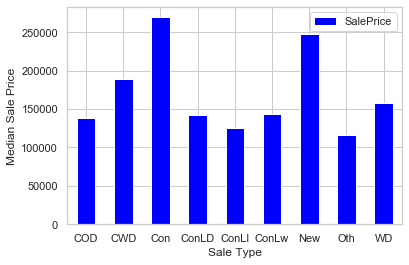

In [101]:
condition_pivot = train.pivot_table(index='SaleType', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Type')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [102]:
saletype = {"Oth":1, "COD":2, "New":3, "WD":4, "CWD":4, "VWD":4, "Con":5, "ConLw":5, "ConLI":5, "ConLD":5}
name_saletype = ['SaleType']

for i in name_saletype:
    train[i] = train[i].map(saletype).astype('int64')
    test[i] = test[i].map(saletype).astype('int64')

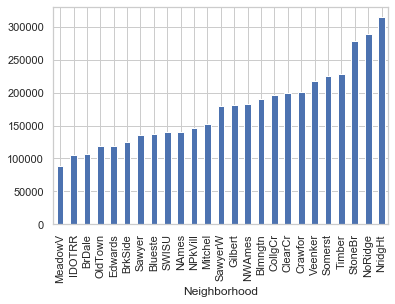

In [103]:
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')

In [104]:
neighborhood_map = {"MeadowV": 0,"IDOTRR": 1,"BrDale": 1,"OldTown": 1,"Edwards": 1,"BrkSide": 1,"Sawyer": 2,"Blueste": 2,"SWISU": 2,"NAmes": 2,"NPkVill": 2,"Mitchel": 2,"SawyerW": 3,"Gilbert": 3,"NWAmes": 3,"Blmngtn": 4,"CollgCr": 4,"ClearCr": 4,"Crawfor": 4,"Veenker": 5,"Somerst": 5,"Timber": 5,"StoneBr": 6,"NoRidge": 6,"NridgHt": 6}
name_neigh = ['Neighborhood']

for i in name_neigh:
    train[i] = train[i].map(neighborhood_map).astype('int64')
    test[i] = test[i].map(neighborhood_map).astype('int64')

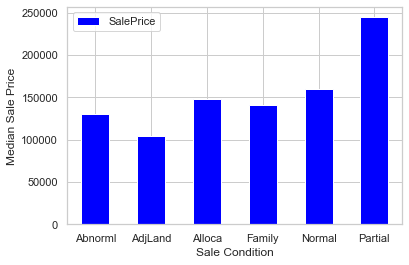

In [105]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [106]:
salecond = {'Abnorml':0,'Alloca':0,'AdjLand':0,'Family':0,'Normal':0,'Partial':1}
name_sale = ['SaleCondition']

for i in name_sale:
    train[i] = train[i].map(salecond).astype('int64')
    test[i] = test[i].map(salecond).astype('int64')

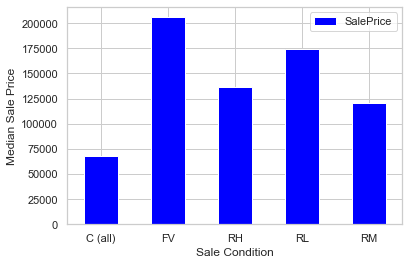

In [107]:
condition_pivot = train.pivot_table(index='MSZoning', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [108]:
zoning = {"A":0, "I":0,"C (all)":1,"RL":2,"RP":2,"FV":3, "RH":4, "RM":4}
name_zone = ['MSZoning']

for i in name_zone:
    train[i] = train[i].map(zoning).astype('int64')
    test[i] = test[i].map(zoning).astype('int64')

In [109]:
elec = {"SBrkr":1,"FuseA":0,"FuseF":0, "FuseP":0, "Mix":0}
name_elec = ['Electrical']

for i in name_elec:
    train[i] = train[i].map(elec).astype('int64')
    test[i] = test[i].map(elec).astype('int64')

#### Let us convert the remaining columns which are categorical into the numerical using the Label Encoder

In [110]:
varst = np.array(['HouseStyle','RoofStyle','Exterior2nd','Exterior1st','Foundation','GarageType','MasVnrType','BsmtFinType1'])

#### Function defined to convert the columns into numerical values

In [111]:
le = LabelEncoder()
def factorize(data, var):
    le.fit(data[var])
    data[var] = le.transform(data[var])
    data[var] = data[var].astype('int64')
    return data

In [112]:
for x in varst:
    factorize(train, x)

In [113]:
for x in varst:
    factorize(test, x)

### Data Type Conversion

#### Let us check the datatype of each features and we need to make sure that all the features are of same datatype.

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 39 columns):
OverallQual      1452 non-null int64
GrLivArea        1452 non-null int64
GarageCars       1452 non-null int64
GarageArea       1452 non-null int64
TotalBsmtSF      1452 non-null int64
1stFlrSF         1452 non-null int64
FullBath         1452 non-null int64
TotRmsAbvGrd     1452 non-null int64
YearBuilt        1452 non-null int64
YearRemodAdd     1452 non-null int64
GarageYrBlt      1452 non-null float64
MasVnrArea       1452 non-null float64
Fireplaces       1452 non-null int64
LotFrontage      1452 non-null float64
WoodDeckSF       1452 non-null int64
2ndFlrSF         1452 non-null int64
OpenPorchSF      1452 non-null int64
HalfBath         1452 non-null int64
LotArea          1452 non-null int64
MSZoning         1452 non-null int64
Foundation       1452 non-null int64
BsmtFinType1     1452 non-null int64
Neighborhood     1452 non-null int64
GarageType       1452 non-null int64

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
OverallQual      1459 non-null int64
GrLivArea        1459 non-null int64
GarageCars       1459 non-null float64
GarageArea       1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
FullBath         1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
GarageYrBlt      1459 non-null float64
MasVnrArea       1459 non-null float64
Fireplaces       1459 non-null int64
LotFrontage      1459 non-null float64
WoodDeckSF       1459 non-null int64
2ndFlrSF         1459 non-null int64
OpenPorchSF      1459 non-null int64
HalfBath         1459 non-null int64
LotArea          1459 non-null int64
MSZoning         1459 non-null int64
Foundation       1459 non-null int64
BsmtFinType1     1459 non-null int64
Neighborhood     1459 non-null int64
GarageType       1459 non-null

#### There are 3 columns which needs to be converted from float64 into int64 datatype.

In [116]:
convert = ['GarageYrBlt','MasVnrArea','LotFrontage']
convert_test = ['GarageYrBlt','MasVnrArea','LotFrontage','TotalBsmtSF','GarageArea','GarageCars']

for x in convert:
    train[x]=train[x].astype('int64')
    
for x in convert_test:
    test[x]=test[x].astype('int64')

#### Check for Multicollinearity

Strong correlation of these features to other, similar features:
'GrLivArea' and 'TotRmsAbvGrd',
'YearBuilt' and 'GarageYrBlt'

#### Let us drop the features which have low correlation among themselves.

In [117]:
mulcol = ['TotRmsAbvGrd','GarageYrBlt']

for x in mulcol:
    train = train.drop(x,axis='columns')
    test = test.drop(x,axis='columns')

### Feature Engineering

In [118]:
train.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'Fireplaces', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'LotArea', 'MSZoning', 'Foundation', 'BsmtFinType1',
       'Neighborhood', 'GarageType', 'MasVnrType', 'ExterQual', 'CentralAir',
       'Electrical', 'KitchenQual', 'SaleType', 'SaleCondition',
       'BsmtExposure', 'Exterior2nd', 'Exterior1st', 'GarageCond',
       'GarageQual', 'HouseStyle', 'RoofStyle', 'SalePrice'],
      dtype='object')

In [119]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['Total_Bathrooms'] = train['FullBath'] + train['HalfBath']
train['Total_porch'] = train['WoodDeckSF'] + train['OpenPorchSF']

In [120]:
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['Total_Bathrooms'] = test['FullBath'] + test['HalfBath']
test['Total_porch'] = test['WoodDeckSF'] + test['OpenPorchSF']

#### We need to drop the columns or features which are used in the feature engineering.

In [121]:
drop_feat = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','WoodDeckSF','OpenPorchSF']

for x in drop_feat:
    train = train.drop(x,axis='columns')
    test = test.drop(x,axis='columns')

### Selection Method

In [122]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} ".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
            #print(scores_with_candidates)
        scores_with_candidates.sort()
        #print(scores_with_candidates)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            #print(best_new_score)
            #print(best_candidate)
            current_score = best_new_score
        print(selected)
    formula = "{} ~ {} ".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [123]:
model = forward_selected(train,'SalePrice')

print (model.model.formula)
print (model.rsquared_adj)

['TotalSF']
['TotalSF', 'OverallQual']
['TotalSF', 'OverallQual', 'Neighborhood']
['TotalSF', 'OverallQual', 'Neighborhood', 'KitchenQual']
['TotalSF', 'OverallQual', 'Neighborhood', 'KitchenQual', 'BsmtExposure']
['TotalSF', 'OverallQual', 'Neighborhood', 'KitchenQual', 'BsmtExposure', 'GarageArea']
['TotalSF', 'OverallQual', 'Neighborhood', 'KitchenQual', 'BsmtExposure', 'GarageArea', 'GrLivArea']
['TotalSF', 'OverallQual', 'Neighborhood', 'KitchenQual', 'BsmtExposure', 'GarageArea', 'GrLivArea', 'SaleCondition']
['TotalSF', 'OverallQual', 'Neighborhood', 'KitchenQual', 'BsmtExposure', 'GarageArea', 'GrLivArea', 'SaleCondition', 'BsmtFinType1']
['TotalSF', 'OverallQual', 'Neighborhood', 'KitchenQual', 'BsmtExposure', 'GarageArea', 'GrLivArea', 'SaleCondition', 'BsmtFinType1', 'LotArea']
['TotalSF', 'OverallQual', 'Neighborhood', 'KitchenQual', 'BsmtExposure', 'GarageArea', 'GrLivArea', 'SaleCondition', 'BsmtFinType1', 'LotArea', 'MasVnrArea']
['TotalSF', 'OverallQual', 'Neighborhood'

#### Based on the Forward Selection method below are the features which will be selected for the model.
SalePrice ~ TotalSF + OverallQual + Neighborhood + KitchenQual + BsmtExposure + GarageArea + GrLivArea + SaleCondition + BsmtFinType1 + LotArea + MasVnrArea + MasVnrType + ExterQual + RoofStyle + Total_porch + Fireplaces + GarageQual + LotFrontage + YearRemodAdd + Exterior1st + Exterior2nd + GarageType + MSZoning + SaleType + Electrical + CentralAir + HouseStyle + Foundation

### Building a model

#### Let us import all the dependencies required to build the model
We will test the following Regressors from scikit-learn:
#LinearRegression
#Ridge
#Lasso
#DecisionTreeRegressor
#RandomForestRegressor
#KNeighborRegressor
#XGBoostRegressor
#SVR

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#### We’ll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y.

In [125]:
features = ['TotalSF','OverallQual','Neighborhood','KitchenQual','BsmtExposure','GarageArea','GrLivArea','SaleCondition','BsmtFinType1','LotArea','MasVnrArea','MasVnrType','ExterQual','RoofStyle','Total_porch','Fireplaces','GarageQual','LotFrontage','YearRemodAdd','Exterior1st','Exterior2nd','GarageType','MSZoning','SaleType','Electrical','CentralAir','HouseStyle','Foundation']
X = train[features]
y = np.log(train['SalePrice'])

#### Defining the function for Root Mean Squared Error

In [126]:
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

#### Let us test the data with each of the above mentioned model without using any parameter and determine the score for each of the model.

In [127]:
lin_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
decision_model = DecisionTreeRegressor()
random_model = RandomForestRegressor()
neigh_model = KNeighborsRegressor()
supp_model = SVR()
grad_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()

regressor = [lin_model,lasso_model,ridge_model,decision_model,random_model,neigh_model,supp_model,grad_model,xgb_model]

for x in regressor:
    print('For Model:',x)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
    x.fit(X_train,y_train)
    y_pred = x.predict(X_test)
    print('The R2 score is:',x.score(X_test,y_test))
    print('RMSE is: ',rmse(y_test,y_pred))
    print()

For Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The R2 score is: 0.9093621835058072
RMSE is:  0.11699153417374936

For Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
The R2 score is: 0.7955777414858372
RMSE is:  0.17569678310970901

For Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
The R2 score is: 0.9093879154244381
RMSE is:  0.11697492614827137

For Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, split

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The R2 score is: 0.8751138415638409
RMSE is:  0.13732729706730604

For Model: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
The R2 score is: 0.7007025690386695
RMSE is:  0.21259410280622085

For Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The R2 score is: 0.00035179676440333374
RMSE is:  0.38852888673431685

For Model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
The R2 score is: 0.9118606276789745
RMSE is:  0.1153678224663277

For Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


The R2 score is: 0.9151349842845378
RMSE is:  0.11320459799882415



#### From the above we can see that ExtremeGradient Boosting, Gradient Boosting, Ridge, Linear Regression & Random Forest Regressor performed well respectively.

### Hyperparameter Tuning

#### Now let us find the optimal parameter for each of the model and then see the score for each model.

In [128]:
model_params = {
    'svr': {'model': SVR(),
            'params': {'C': [1,10,20],'kernel': ['rbf','linear','poly','sigmoid','precomputed'],'gamma':['auto','scale']}},
    
    'random_forest': {'model': RandomForestRegressor(),
                      'params':{'n_estimators': [1,5,10,100],'min_samples_split': [2,3,4,6,8,10],
                                'max_features':['auto','sqrt','log2',None]}},
    
    'linear_regression' : {'model':LinearRegression(),
                           'params':{'fit_intercept':[True,False],'normalize':[True,False],
                                                                'copy_X':[True, False]}},
    
    'lasso_regression': {'model':Lasso(),
                         'params':{'alpha':[1,0.1,0.01,0.001,0.0001],'fit_intercept':[True,False],'normalize':[True,False],
                         'copy_X':[True, False]}},
    
    'ridge_regression': {'model':Ridge(),
                         'params':{'alpha':[0.001,0.005,0.01,0.1,1,1.5,2,0.5],'fit_intercept':[True,False],'normalize':[True,False],
                         'copy_X':[True, False],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}},
    
    'decision_tree': {'model': DecisionTreeRegressor(),
                      'params': {'criterion': ['mse','friedman_mse','mae'],'splitter':['random','best'],
                                'max_features':['auto','sqrt','log2',None],'max_depth':[7,8,9,10],
                                 'max_leaf_nodes':[None, 12,15,18,20] ,'min_samples_split': [20,25,30]}},
    'kneighbours': {'model':KNeighborsRegressor(),
                       'params':{'n_neighbors':[3,4,5,6,7,10,15],'weights':['uniform','distance'],
                                 'algorithm':['ball_tree','kd_tree','brute'],'p':[1,2]}},
    'gradient_boosting': {'model':GradientBoostingRegressor(),
                         'params':{'loss':['ls','lad','huber','quantile'],'learning_rate':[0.01,0.05,0.1,1,0.001,0.005],
                                  'n_estimators':[1,10,100,1000,2000,3000],'criterion':['mse','friedman_mse','mae'],
                                  'max_depth':[2,4,6,8,10],'max_features':['auto','sqrt','log2',None]}}
}

#### est = GradientBoostingRegressor()
params = {'loss':['ls','lad','huber','quantile'],'learning_rate':[0.01,0.05,0.1,1,0.001,0.005],
                                  'n_estimators':[1,10,100,1000,2000,3000],'criterion':['mse','friedman_mse','mae'],
                                  'max_depth':[2,4,6,8,10],'max_features':['auto','sqrt','log2',None]}
ht = GridSearchCV(estimator=est, param_grid=param_grid, cv=10)
ht.fit(X,y)
print('best_params:',ht.best_params_)


#### scores = []
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=kfolds, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_params'])
df

#### scores_new = []
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=kfolds, return_train_score=False,n_iter = 2,verbose=0, n_jobs=-1, scoring ='accuracy')
    clf.fit(X, y)
    scores_new.append({
        'model': model_name,
        'best_params': clf.best_params_
    })
    
df_new = pd.DataFrame(scores_new,columns=['model','best_params'])
df_new

#### Gradient Boosting HyperParameter Tuning

In [129]:
estm = GradientBoostingRegressor()
params = {'loss':['ls','lad','huber','quantile'],'learning_rate':[0.01,0.05,0.1,0.001,0.005],
                                  'n_estimators':[100,1000,2000,3000],'criterion':['friedman_mse'],
                                  'max_depth':[2,4,6,8],'max_features':['auto','sqrt','log2',None]}
rsc = RandomizedSearchCV(estimator=estm, param_distributions=params, cv=10,return_train_score=False,n_iter = 2,verbose=0, n_jobs=-1)
rsc.fit(X,y)
print('best_params:',rsc.best_params_)

best_params: {'n_estimators': 2000, 'max_features': 'log2', 'max_depth': 8, 'loss': 'huber', 'learning_rate': 0.01, 'criterion': 'friedman_mse'}


In [132]:
print('best score:',rsc.best_score_)

best score: 0.8960468537449499


#### Linear Regression Hyper Parameter Tuning

In [133]:
est_lin = LinearRegression()
params = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True, False]}
linear = RandomizedSearchCV(estimator=est_lin, param_distributions=params, cv=10,return_train_score=False,n_iter = 2,verbose=0, n_jobs=-1)
linear.fit(X,y)
print('best_params:',linear.best_params_)
print('best score:',linear.best_score_)

best_params: {'normalize': True, 'fit_intercept': True, 'copy_X': False}
best score: 0.8914776202341216


#### Lasso Regression Hyper Parameter Tuning

In [135]:
est_lasso = Lasso()
params = {'alpha':[1,0.1,0.01,0.001,0.0001],'fit_intercept':[True,False],'normalize':[True,False],
                         'copy_X':[True, False]}
las = RandomizedSearchCV(estimator=est_lasso, param_distributions=params, cv=10,return_train_score=False,n_iter = 2,verbose=0, n_jobs=-1)
las.fit(X,y)
print('best_params:',las.best_params_)
print('best score:',las.best_score_)

best_params: {'normalize': False, 'fit_intercept': True, 'copy_X': False, 'alpha': 0.1}
best score: 0.8043296355669833


#### Ridge Regression Hyper Parameter Tuning

#### We found out the value of alpha using the cross validation score

In [144]:
Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [143]:
# List to maintain the cross-validation scores 
cross_val_scores_ridge = [] 
from statistics import mean 
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1,50): 
    ridgeModel = Ridge(alpha = i * 0.05) 
    #alpha.append(alpha)
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    Lambda.append(i * 0.05) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(Lambda)): 
    print(str(Lambda[i])+' : '+str(cross_val_scores_ridge[i])) 

0.05 : 89.14616313703915
0.1 : 89.1461949462688
0.15000000000000002 : 89.14622553692674
0.2 : 89.14625491543852
0.25 : 89.14628308819358
0.30000000000000004 : 89.14631006154546
0.35000000000000003 : 89.14633584181195
0.4 : 89.14636043527545
0.45 : 89.14638384818309
0.5 : 89.14640608674704
0.55 : 89.14642715714463
0.6000000000000001 : 89.14644706551866
0.65 : 89.1464658179776
0.7000000000000001 : 89.1464834205958
0.75 : 89.14649987941367
0.8 : 89.14651520043797
0.8500000000000001 : 89.146529389642
0.9 : 89.14654245296572
0.9500000000000001 : 89.14655439631613
1.0 : 89.14656522556734
1.05 : 89.14657494656082
1.1 : 89.14658356510563
1.1500000000000001 : 89.14659108697857
1.2000000000000002 : 89.14659751792455
1.25 : 89.14660286365644
1.3 : 89.14660712985571
1.35 : 89.14661032217225
1.4000000000000001 : 89.14661244622481
1.4500000000000002 : 89.14661350760113
1.5 : 89.146613511858
1.55 : 89.14661246452177
1.6 : 89.14661037108816
1.6500000000000001 : 89.1466072370227
1.7000000000000002 : 89

#### Support Vector Hyper Parameter Tuning

In [150]:
est_svr = SVR()
params = {'C': [1,10,20],'kernel': ['rbf','linear','poly','sigmoid','precomputed'],'gamma':['auto','scale']}
supp = RandomizedSearchCV(estimator=est_svr, param_distributions=params, cv=10,return_train_score=False,n_iter = 2,verbose=0, n_jobs=-1)
supp.fit(X,y)
print('best_params:',supp.best_params_)
print('best score:',supp.best_score_)

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best_params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 20}
best score: 0.7546797848750139


In [146]:
est_lin = LinearRegression()
params = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True, False]}
linear = RandomizedSearchCV(estimator=est_lin, param_distributions=params, cv=5,return_train_score=False,n_iter = 2,verbose=0, n_jobs=-1)
linear.fit(X,y)
print('best_params:',linear.best_params_)
print('best score:',linear.best_score_)

best_params: {'normalize': False, 'fit_intercept': True, 'copy_X': False}
best score: 0.8916933865474901


In [147]:
est_lasso = Lasso()
params = {'alpha':[1,0.1,0.01,0.001,0.0001],'fit_intercept':[True,False],'normalize':[True,False],
                         'copy_X':[True, False]}
las = RandomizedSearchCV(estimator=est_lasso, param_distributions=params, cv=5,return_train_score=False,n_iter = 2,verbose=0, n_jobs=-1)
las.fit(X,y)
print('best_params:',las.best_params_)
print('best score:',las.best_score_)

best_params: {'normalize': False, 'fit_intercept': False, 'copy_X': False, 'alpha': 0.001}
best score: 0.87257528686857


In [149]:
estm = GradientBoostingRegressor()
params = {'loss':['ls','lad','huber','quantile'],'learning_rate':[0.01,0.05,0.1,0.001,0.005],
                                  'n_estimators':[100,1000,2000,3000],'criterion':['friedman_mse'],
                                  'max_depth':[2,4,6,8],'max_features':['auto','sqrt','log2',None]}
rsc = RandomizedSearchCV(estimator=estm, param_distributions=params, cv=5,return_train_score=False,n_iter = 2,verbose=0, n_jobs=-1)
rsc.fit(X,y)
print('best_params:',rsc.best_params_)
print('best score:',rsc.best_score_)

best_params: {'n_estimators': 2000, 'max_features': 'sqrt', 'max_depth': 4, 'loss': 'huber', 'learning_rate': 0.01, 'criterion': 'friedman_mse'}
best score: 0.9024236135283711


In [160]:
lin_model_new = LinearRegression(normalize= False,fit_intercept=True,copy_X= False)
lasso_model_new = Lasso(normalize= False,fit_intercept= False,copy_X= False,alpha= 0.001)
ridge_model_new = Ridge(alpha=1.5,copy_X=True,fit_intercept=True,max_iter=None,normalize=False,random_state=None,solver='auto',tol=0.001)
decision_model_new = DecisionTreeRegressor()
random_model_new = RandomForestRegressor()
neigh_model_new = KNeighborsRegressor()
supp_model_new = SVR(kernel='rbf',gamma='scale',C=20)
grad_model_new = GradientBoostingRegressor(n_estimators=2000,max_features='sqrt',max_depth=4,loss='huber',learning_rate=0.01,criterion='friedman_mse')
xgb_model_new = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3000,max_depth=3, min_child_weight=0,gamma=0, subsample=0.7,colsample_bytree=0.7,objective='reg:linear',nthread=-1,scale_pos_weight=1,seed=27,reg_alpha=0.00006)

regressor = [lin_model_new,lasso_model_new,ridge_model_new,decision_model_new,random_model_new,neigh_model_new,supp_model_new,grad_model_new,xgb_model_new]

for x in regressor:
    print('For model_new:',x)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
    x.fit(X_train,y_train)
    y_pred = x.predict(X_test)
    scores = cross_val_score(x, X, y, cv = 5) 
    avg_cross_val_score = mean(scores)*100
    print('Avg CV Score is:',avg_cross_val_score)
    print('The R2 score is:',x.score(X_test,y_test))
    print('RMSE is: ',rmse(y_test,y_pred))
    print()

For model_new: LinearRegression(copy_X=False, fit_intercept=True, n_jobs=None, normalize=False)
Avg CV Score is: 89.16807814328462
The R2 score is: 0.9093621835058072
RMSE is:  0.11699153417374936

For model_new: Lasso(alpha=0.001, copy_X=False, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Avg CV Score is: 87.25563443126886
The R2 score is: 0.8935610505834171
RMSE is:  0.126779784282515

For model_new: Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Avg CV Score is: 89.16730758805556
The R2 score is: 0.9093978025360769
RMSE is:  0.11696854413140292

For model_new: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
          

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Avg CV Score is: 86.4919337098403
The R2 score is: 0.8872207126614303
RMSE is:  0.13050116593227284

For model_new: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Avg CV Score is: 67.49906435588589
The R2 score is: 0.7007025690386695
RMSE is:  0.21259410280622085

For model_new: SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Avg CV Score is: 74.8696100956764
The R2 score is: 0.7484804238088671
RMSE is:  0.1948882317127947

For model_new: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          m

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:14:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:14:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:15:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:15:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:15:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Avg CV Score is: 89.99460938225764
The R2 score is: 0.9207442009647893
RMSE is:  0.1093994763511375



#### Finally we will make use of the Extreme Gradient Boosting for predicting the values of test data set.

In [168]:
test_final_data = test[features]

xgb_model_final = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3000,max_depth=3, min_child_weight=0,gamma=0, subsample=0.7,colsample_bytree=0.7,objective='reg:linear',nthread=-1,scale_pos_weight=1,seed=27,reg_alpha=0.00006)
regressor_final = ['xgb_model_final']

for x in regressor:
    print('For model_new:',x)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
    x.fit(X_train,y_train)
    y_pred_final = x.predict(test_final_data)
    

#submit this prediction and get the score
pred_final = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': np.exp(y_pred_final)})
pred_final.to_csv('XGBoost.csv', header=True, index=False)

For model_new: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
             n_jobs=1, nthread=-1, objective='reg:squarederror', random_state=0,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.2, verbosity=1)


#### Let try to predict the output using the predicted values from different models

In [184]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
xgb_model_final.fit(X_train,y_train)
grad_model_new.fit(X_train,y_train)
ridge_model_new.fit(X_train,y_train)
y_pred_xgb = xgb_model_final.predict(test_final_data)
y_pred_grad = grad_model_new.predict(test_final_data)
y_pred_ridge = ridge_model_new.predict(test_final_data)

pred_final = pd.DataFrame({'Id': test_df['Id'], 'Xgb': np.exp(y_pred_xgb),'Grad':np.exp(y_pred_grad),'Ridge':np.exp(y_pred_ridge)})

C:\Users\UPPI\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:12:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [185]:
pred_final.head()

,Id,Xgb,Grad,Ridge
0,1461,125104.789062,125952.078193,117828.426572
1,1462,168130.781250,164383.838019,159580.720934
2,1463,184539.343750,185690.906224,167131.178415
3,1464,184239.703125,191801.803070,184058.995454
4,1465,189778.171875,190603.800207,207206.984631


In [186]:
pred_final['SalePrice'] = pred_final['Xgb']*0.70 + pred_final['Grad']*0.20 + pred_final['Ridge']*0.10

In [187]:
pred_final.head()

,Id,Xgb,Grad,Ridge,SalePrice
0,1461,125104.789062,125952.078193,117828.426572,124546.609858
1,1462,168130.781250,164383.838019,159580.720934,166526.386572
2,1463,184539.343750,185690.906224,167131.178415,183028.838149
3,1464,184239.703125,191801.803070,184058.995454,185734.049222
4,1465,189778.171875,190603.800207,207206.984631,191686.177255


In [188]:
cols = ['Id','SalePrice']
pred_final_new = pred_final[cols]
pred_final_new.to_csv('Mix_trend.csv', header=True, index=False)

In [189]:
y_pred_mix = (y_pred_grad + y_pred_xgb)/2

In [191]:
pred_final_mix = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': np.exp(y_pred_mix)})

In [193]:
pred_final_mix.to_csv('Mixed_trend.csv', header=True, index=False)